In [1]:
import pandas as pd



excel_file = pd.ExcelFile("附件.xlsx")


# 获取所有表名
sheet_name = excel_file.sheet_names


sheet_name
# 注：我们使用的是 vs code 上的 Jupiter Notebook 插件。在最后的代码单独写变量，可以直接输出内容



['男胎检测数据', '女胎检测数据']

In [2]:
import pandas as pd


# 定义列名映射字典
column_mapping = {
    '序号': 'Serial Number',
    '孕妇代码': 'Pregnant Woman Code',
    '年龄': 'Age',
    '身高': 'Height',
    '体重': 'Weight',
    '末次月经': 'Last Menstrual Period',
    'IVF妊娠': 'IVF Pregnancy',
    '检测日期': 'Test Date',
    '检测抽血次数': 'Number of Blood Draws for Testing',
    '检测孕周': 'Gestational Week at Testing',
    '孕妇BMI': 'Pregnant Woman\'s BMI',
    '原始读段数': 'Number of Raw Reads',
    '在参考基因组上比对的比例': 'Alignment Rate to Reference Genome',
    '重复读段的比例': 'Proportion of Duplicate Reads',
    '唯一比对的读段数  ': 'Number of Uniquely Aligned Reads',
    '唯一比对的读段数': 'Number of Uniquely Aligned Reads',
    'GC含量': 'GC Content',
    '13号染色体的Z值': 'Z-score of Chromosome 13',
    '18号染色体的Z值': 'Z-score of Chromosome 18',
    '21号染色体的Z值': 'Z-score of Chromosome 21',
    'X染色体的Z值': 'Z-score of Chromosome X',
    'Y染色体的Z值': 'Z-score of Chromosome Y',
    'Y染色体浓度': 'Concentration of Chromosome Y',
    'X染色体浓度': 'Concentration of Chromosome X',
    '13号染色体的GC含量': 'GC Content of Chromosome 13',
    '18号染色体的GC含量': 'GC Content of Chromosome 18',
    '21号染色体的GC含量': 'GC Content of Chromosome 21',
    '被过滤掉读段数的比例': 'Proportion of Filtered Reads',
    '染色体的非整倍体': 'Chromosomal Aneuploidy',
    '怀孕次数': 'Number of Pregnancies',
    '生产次数': 'Number of Deliveries',
    '胎儿是否健康': 'Whether the Fetus is Healthy'
}
# 因为我们更熟悉英文，所以先将数据处理成英文文件，然后才进行数据处理。
# 我们发现工作表男胎检测数据的第O列“唯一比对的读段数  ”后面有两个空格，而工作表女胎检测数据中却没有。

male_df = pd.read_excel('附件.xlsx', sheet_name='男胎检测数据')
female_df = pd.read_excel('附件.xlsx', sheet_name='女胎检测数据')


# 重命名列名
male_df.rename(columns=column_mapping, inplace=True)
# 调用 male_df 的 rename 方法，使用之前定义的 column_mapping 字典对 male_df 的列名进行重命名。
female_df.rename(columns=column_mapping, inplace=True)
# 同样使用 read_excel 函数读取指定 Excel 文件中名为 '女胎检测数据' 的工作表。

# 处理IVF Pregnancy列的值
male_df['IVF Pregnancy'] = male_df['IVF Pregnancy'].replace({
    '自然受孕': 'Natural conception',
    'IVF（试管婴儿）': 'IVF',
    'IUI（人工授精）': 'IUI'
})
# 在 male_df 中，针对 'IVF Pregnancy' 列，
# 使用 replace 方法将其中特定的中文值（'自然受孕'、'IVF（试管婴儿）'、'IUI（人工授精）'）替换为对应的英文值。

male_df['Whether the Fetus is Healthy'] = male_df['Whether the Fetus is Healthy'].replace({
    '是': 'yes',
    '否': 'no'
})
# 对 male_df 中的 'Whether the Fetus is Healthy' 列进行类似的操作，将中文的 '是' 和 '否' 替换为英文的 'yes' 和 'no'。

female_df['IVF Pregnancy'] = female_df['IVF Pregnancy'].replace({
    '自然受孕': 'Natural conception',
    'IVF（试管婴儿）': 'IVF',
    'IUI（人工授精）': 'IUI'
})
# 在 female_df 中，对 'IVF Pregnancy' 列执行与 male_df 中相同的值替换操作。

female_df['Whether the Fetus is Healthy'] = female_df['Whether the Fetus is Healthy'].replace({
    '是': 'yes',
    '否': 'no'
})
# 对 female_df 中的 'Whether the Fetus is Healthy' 列也进行中文到英文的值替换。

# 保存到新的Excel文件
with pd.ExcelWriter('Attached.xlsx') as writer:
    male_df.to_excel(writer, sheet_name='Male Fetal Detection Data', index=False)
     # 将处理后的 male_df 数据框写入到新的 Excel 文件中，工作表名为 'Male Fetal Detection Data'，不写入索引。
    female_df.to_excel(writer, sheet_name='Female Fetal Detection Data', index=False)
    # 将处理后的 female_df 数据框写入到新的 Excel 文件中，工作表名为 'Female Fetal Detection Data'，不写入索引。

print("列名和IVF Pregnancy列的值已成功更改为英文，并保存到 Attached.xlsx 文件中")

列名和IVF Pregnancy列的值已成功更改为英文，并保存到 Attached.xlsx 文件中


In [3]:
# 核心目的：加载并初步探索NIPT检测数据的Excel文件（Attached.xlsx，此前已将列名和关键值转为英文）


excel_file = pd.ExcelFile("Attached.xlsx")


sheet_name = excel_file.sheet_names


for sheet in sheet_name:
    
    # df：存储当前工作表的完整数据（含NIPT检测的所有字段，如孕妇BMI、孕周、Y染色体浓度等）
    df = excel_file.parse(sheet)

    # 查看数据的基本信息
    print(f'Basic information about sheet table name {sheet}')
    df.info()

    
    # rows：存储当前工作表的总行数（即NIPT检测样本数量）
    # columns：存储当前工作表的总列数（即NIPT检测的字段数量，如孕妇信息、测序指标、染色体检测结果等）
    rows, columns = df.shape

    # 条件判断：区分短表和长表，采用不同的预览方式
    # 短表定义：行数少于100且列数少于20——此类数据规模小，全量输出可完整查看所有样本和字段
    # 长表定义：不满足短表条件的表——NIPT数据通常样本量较大...仅看前几行
    if rows < 100 and columns < 20:
       
        print(f'Full content information for sheet table named {sheet}:')
        print(df.to_csv(sep='\t', na_rep='nan'))
    else:
        print(f'First few rows of content information for sheet table named {sheet}:')
        print(df.head().to_csv(sep='\t', na_rep='nan'))

        #输出结果分析：
        #1.关键变量的完整性与适用性（针对研究问题 1）
           #研究问题 1 聚焦 “Y 染色体浓度与孕妇孕周、BMI 的相关性”，核心变量的表现如下：
              #Y 染色体浓度（Concentration of Chromosome Y）作为男胎特有的指标，虽输出结果未完整显示，但结合 “Male Fetal Detection Data” 的属性及 NIPT 检测逻辑，该列应为全量非空（1082 条记录均有值），且数据类型为数值型（可从其他染色体浓度列的float64类型推断），直接满足相关性分析的变量要求。
              #孕妇 BMI（Pregnant Woman's BMI）1082 条记录均无缺失，数据类型为float64（数值型），可直接用于计算相关性或构建回归模型。从示例数据看，BMI 值多在 32-35 之间（如 B001 的 32.38、32.76，B002 的 35.26），符合研究背景中 “数据以高 BMI 孕妇为主” 的特征，便于针对性分析高 BMI 群体中 Y 染色体浓度与孕周的关系。
              #检测孕周（Gestational Week at Testing）1082 条记录均无缺失，但数据类型为object（字符串型），格式为 “16w+3”“19w+6”“23w” 等（周数 + 天数），需通过数据转换（如提取 “16”“19”“23” 等周数数值）转为数值型变量后，才能参与相关性计算或建模。示例中同一孕妇（如 B001）存在多次检测记录，孕周随检测时间递增（16w+3 → 19w+6 → 23w）。
        #2.其他重要指标的特征分析
           #数据完整性：
                #多数指标无缺失（如年龄、身高、体重、测序质量指标等），仅 “Last Menstrual Period”（末次月经）缺失 12 条（占比 1.1%），缺失比例极低，对整体分析影响可忽略。 
                #“Chromosomal Aneuploidy”（染色体非整倍体）多数为nan（表示无异常），与 “Whether the Fetus is Healthy” 多为 “yes” 的结果一致。
           #测序质量：
                #“GC Content”（整体 GC 含量）在 0.39-0.41 之间（即 39%-41%），接近研究背景中 “正常范围 40%-60%”，说明测序数据质量合格。
                #“Alignment Rate to Reference Genome”（参考基因组比对率）约 0.8（80%），属于 NIPT 检测的合理范围。
           #检测次数：
                #“Number of Blood Draws for Testing” 显示部分孕妇多次检测（如 B001 有 4 次检测），说明数据包含纵向维度。


Basic information about sheet table name Male Fetal Detection Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Serial Number                       1082 non-null   int64  
 1   Pregnant Woman Code                 1082 non-null   object 
 2   Age                                 1082 non-null   int64  
 3   Height                              1082 non-null   float64
 4   Weight                              1082 non-null   float64
 5   Last Menstrual Period               1070 non-null   object 
 6   IVF Pregnancy                       1082 non-null   object 
 7   Test Date                           1082 non-null   object 
 8   Number of Blood Draws for Testing   1082 non-null   int64  
 9   Gestational Week at Testing         1082 non-null   object 
 10  Pregnant Woman's BMI                1082 

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


male_df = pd.read_excel('Attached.xlsx', sheet_name='Male Fetal Detection Data')
female_df = pd.read_excel('Attached.xlsx', sheet_name='Female Fetal Detection Data')


male_df['Fetal_Sex'] = 'male'
female_df['Fetal_Sex'] = 'female'
df = pd.concat([male_df, female_df], ignore_index=True)
# 使用pd.concat()合并两个数据集，ignore_index=True表示重新生成索引（避免原索引重复）
# 合并后的数据框df包含所有样本，通过'Fetal_Sex'可区分胎儿性别，

df['abnormal'] = df['Chromosomal Aneuploidy'].notna().astype(int)
# 构建染色体非整倍体的二值目标变量：
# 'Chromosomal Aneuploidy'（染色体非整倍体）列中，非空值表示检测到异常，空值表示正常
# .notna()将非空值转为True，空值转为False；.astype(int)将True转为1，False转为0
# 新列'abnormal'中，1表示"存在染色体异常"，0表示"正常"，可作为后续分类模型的目标变量


if 'Z-score of Chromosome Y' not in df.columns:
    df['Z-score of Chromosome Y'] = np.nan
if 'Concentration of Chromosome Y' not in df.columns:
    df['Concentration of Chromosome Y'] = np.nan
    # 背景逻辑：女胎无Y染色体，相关指标本应不存在，填充NaN可保持数据框列结构一致

df['Pregnant Woman\'s BMI'] = df['Pregnant Woman\'s BMI'].fillna(
    df['Pregnant Woman\'s BMI'].median())
# 处理BMI的缺失值：
# 已知女性数据中有1个BMI缺失值，用该列的中位数填充

def convert_gestational_week(week_str):
    try:
    # 处理格式如"11w+6"（11周+6天）的字符串：
        weeks, days = week_str.replace('w', '').split('+')
        # 移除'w'，按'+'分割为周和天
        return float(weeks) + float(days)/7
         # 转换为十进制周数（天/7≈周）
    except:
         # 若格式异常（如"23w"），返回NaN（后续可进一步处理）
        return np.nan

df['Gestational_Week_Decimal'] = df['Gestational Week at Testing'].apply(
    convert_gestational_week)
    # 将原始孕周（字符串格式）转换为数值型十进制周数，存储在新列'Gestational_Week_Decimal'
    # 将孕周从文本转为可参与计算的数值


df['Number of Pregnancies'] = pd.to_numeric(df['Number of Pregnancies'], errors='coerce')
# 将"怀孕次数"列转换为数值型：>=3用NaN替代
df['Number of Pregnancies'] = df['Number of Pregnancies'].clip(upper=3)
# 限制"怀孕次数"的最大值为3：
# 这样就直接把>3的都变成3了

def convert_date_to_int(date_val):
    if pd.isna(date_val):
        return 0
    if isinstance(date_val, datetime):
        return int(date_val.strftime('%Y%m%d'))
    if isinstance(date_val, str):
        try:
            return int(pd.to_datetime(date_val).strftime('%Y%m%d'))
        except:
            try:
                return int(date_val)
            except:
                return 0 # 无法转换的字符串返回0
    if isinstance(date_val, (int, float)):
        return int(date_val) # 数值型直接转为整数
    return 0# 其他情况返回0

df['Last_Menstrual_Period_Int'] = df['Last Menstrual Period'].apply(convert_date_to_int)
df['Test_Date_Int'] = df['Test Date'].apply(convert_date_to_int)
# 将"末次月经"和"检测日期"转换为YYYYMMDD格式的整数：
# 将日期从文本/日期格式转为数值

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# 筛选所有数值型列（int/float），作为待标准化的特征

exclude_cols = ['Serial Number', 'abnormal', 'Last_Menstrual_Period_Int', 'Test_Date_Int']
num_cols = [col for col in num_cols if col not in exclude_cols]
# 排除不需要标准化的列：
# - 'Serial Number'（样本序号，无实际意义）
# - 'abnormal'（目标变量，无需标准化）
# - 转换后的日期列（已为整数，保留原始量级更有意义）

scaler = StandardScaler()# 初始化标准化器（将数据缩放到均值=0，标准差=1）
df_std = df.copy()
df_std[num_cols] = scaler.fit_transform(df[num_cols])
# 标准化


cat_vars = ['IVF Pregnancy', 'Whether the Fetus is Healthy', 'Fetal_Sex']
# 定义需要独热编码的分类变量：
# - 'IVF Pregnancy'（受孕方式：自然受孕/IVF/IUI）
# - 'Whether the Fetus is Healthy'（胎儿是否健康：yes/no）
# - 'Fetal_Sex'（胎儿性别：male/female）

df_processed = pd.get_dummies(df_std, columns=cat_vars, drop_first=True)
# 对分类变量进行独热编码：将每个类别转为二进制列（1表示属于该类，0表示不属于）
# drop_first=True：删除每个分类变量的第一个类别列，避免多重共线性（如性别只保留'male'列，1=男，0=女）


Significant variables: ['Gestational_Week_Decimal', "Pregnant Woman's BMI", 'Age', 'Number of Pregnancies', 'IVF Pregnancy_IVF', 'Whether the Fetus is Healthy_yes']

REGRESSION MODEL RESULTS
                                  OLS Regression Results                                 
Dep. Variable:     Concentration of Chromosome Y   R-squared:                       0.056
Model:                                       OLS   Adj. R-squared:                  0.049
Method:                            Least Squares   F-statistic:                     8.014
Date:                           Thu, 25 Sep 2025   Prob (F-statistic):           2.36e-07
Time:                                   14:41:05   Log-Likelihood:                -958.88
No. Observations:                            681   AIC:                             1930.
Df Residuals:                                675   BIC:                             1957.
Df Model:                                      5                                         

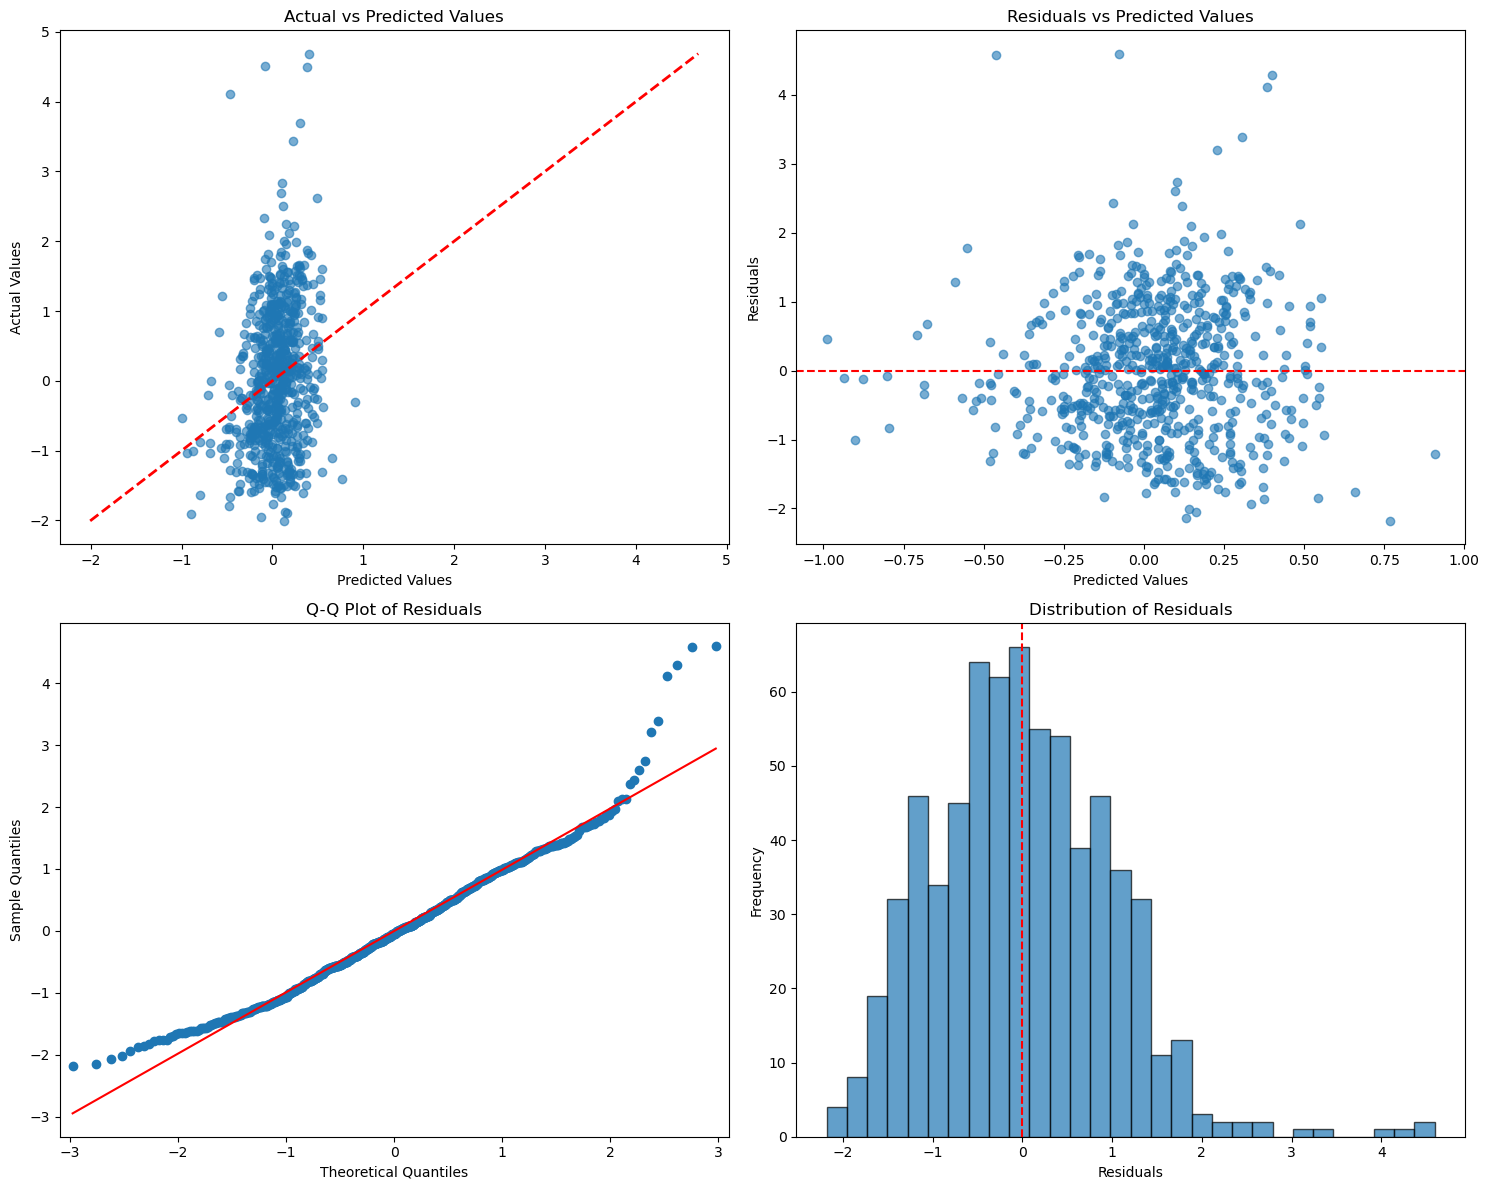

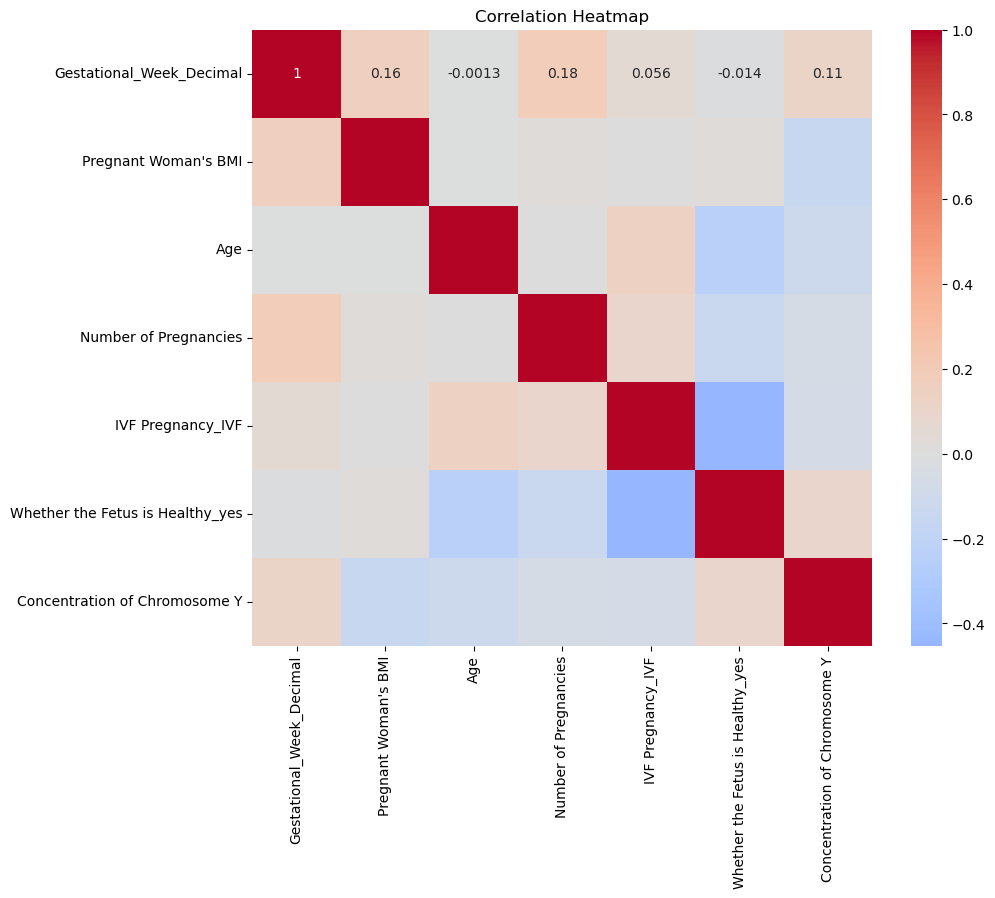


RELATIONSHIP MODEL EQUATION
Y_conc = -0.6480 0.1532*Gestational Week Decimal -0.1647*Pregnant Woman'S Bmi -0.0816*Age -0.0766*Number Of Pregnancies 0.0000*Ivf Pregnancy Ivf 0.6769*Whether The Fetus Is Healthy Yes


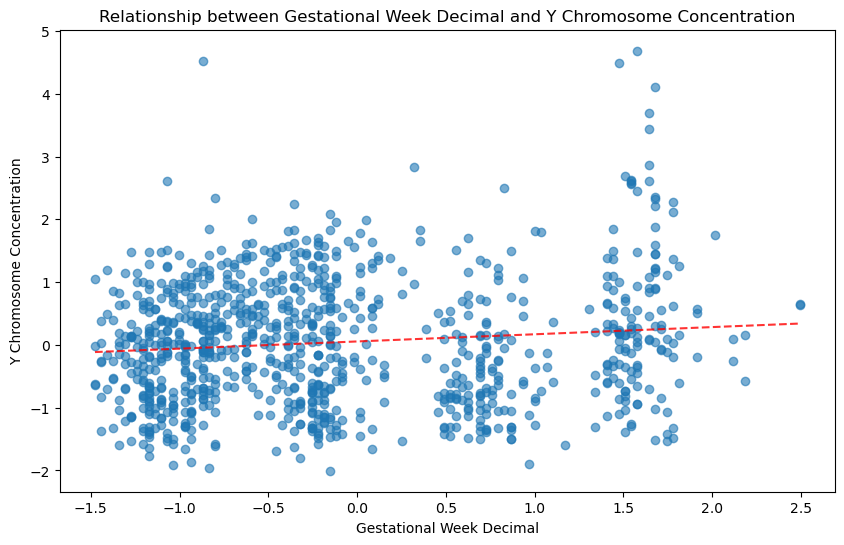

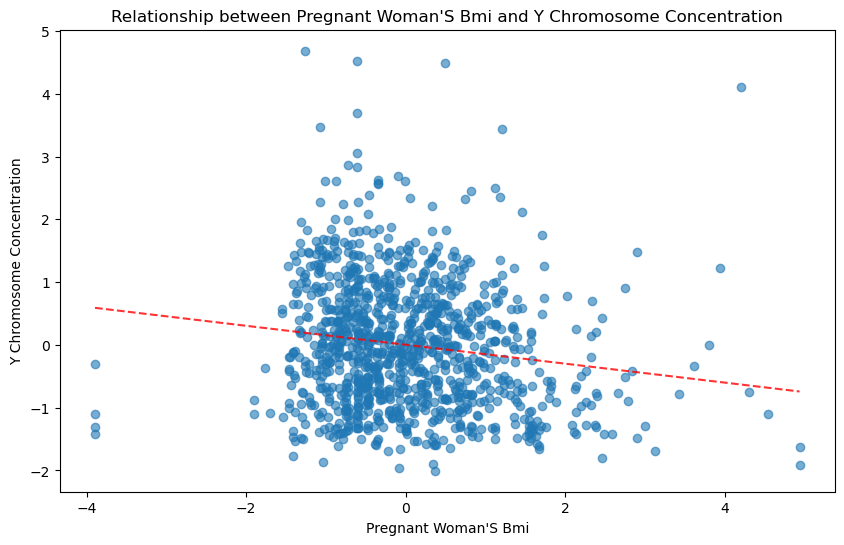

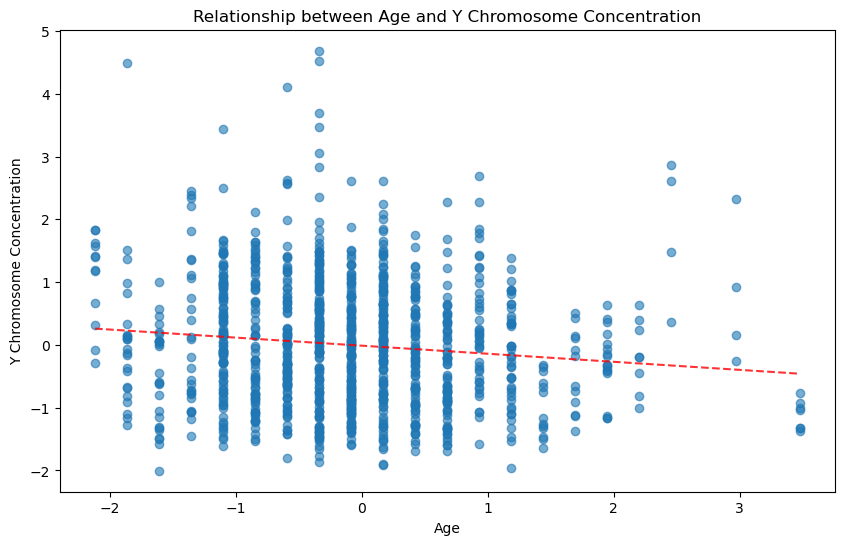

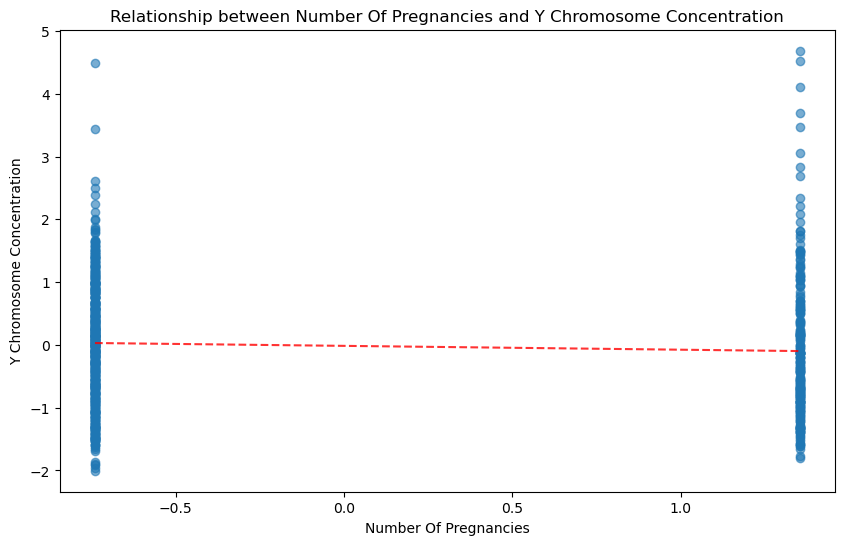

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')


male_data = df_processed[df_processed['Fetal_Sex_male'] == 1].copy()
# 筛选仅男胎数据进行分析：
# 'Fetal_Sex_male'是独热编码后的性别列（1=男胎，0=女胎），通过该条件筛选出所有男胎样本

y = male_data['Concentration of Chromosome Y']

results = {}
# 双变量分析：逐个探究每个自变量与Y染色体浓度的关系

continuous_vars = ['Gestational_Week_Decimal', 'Pregnant Woman\'s BMI', 'Age', 
                   'Number of Pregnancies', 'Number of Deliveries']
# 定义需要分析的连续型自变量：
# - 孕周（已转换为十进制）
# - 孕妇BMI
# - 孕妇年龄
# - 怀孕次数
# - 生产次数

for var in continuous_vars:
    male_data[var] = pd.to_numeric(male_data[var], errors='coerce')
# 确保所有连续变量为数值型：

for var in continuous_vars:
    valid_idx = male_data[var].notna() & y.notna()
    if sum(valid_idx) < 2: 
        continue# 样本量不足2时，无法进行相关性分析，跳过该变量
        
    _, p_norm = stats.shapiro(male_data[var][valid_idx])
    # 正态性检验：Shapiro-Wilk检验用于判断数据是否符合正态分布
    # p值>0.05表示数据近似正态分布；p值<0.05表示非正态分布
    
    if p_norm > 0.05:
        corr, p_value = stats.pearsonr(male_data[var][valid_idx], y[valid_idx])
        method = "Pearson"
    # 若数据正态分布，使用Pearson相关系数：衡量线性相关强度（-1到1之间）
    else:
        corr, p_value = stats.spearmanr(male_data[var][valid_idx], y[valid_idx])
        method = "Spearman"
    # 若数据非正态分布，使用Spearman秩相关：衡量单调关系（不要求线性）
    
    results[var] = {
        'type': 'continuous',
        'correlation': corr,# 相关系数（强度）
        'p_value': p_value, # 显著性p值（<0.05表示相关显著）
        'method': method    # 使用的相关分析方法
    }

categorical_vars = {}
for col in male_data.columns:
    if 'IVF Pregnancy_' in col:
        categorical_vars[col] = 'binary'# 受孕方式相关的二元变量（如IVF vs 自然受孕）
    elif 'Whether the Fetus is Healthy_' in col:
        categorical_vars[col] = 'binary'# 胎儿健康状态的二元变量（健康vs不健康）
# 筛选分类变量：仅保留独热编码后的二元分类变量（因原始分类变量已被编码）

for var, var_type in categorical_vars.items():
    if var_type == 'binary':
        if var not in male_data.columns:
            continue# 若变量不存在，跳过
            
        male_data[var] = pd.to_numeric(male_data[var], errors='coerce')
        # 确保二元变量为数值型（1/0）
        
        valid_idx = male_data[var].notna() & y.notna()
        group1 = y[valid_idx & (male_data[var] == 1)]
        group0 = y[valid_idx & (male_data[var] == 0)]
        
        if len(group1) < 2 or len(group0) < 2:
            continue # 任意组样本量<2时，无法进行组间比较，跳过
            
        _, p_norm1 = stats.shapiro(group1) # 组1正态性检验
        _, p_norm0 = stats.shapiro(group0) # 组0正态性检验
        _, p_var = stats.levene(group1, group0) # 方差齐性检验（Levene检验）
        
        
        if p_norm1 > 0.05 and p_norm0 > 0.05 and p_var > 0.05:
            stat, p_value = stats.ttest_ind(group1, group0)
            method = "t-test"
            # 若满足正态性和方差齐性，使用独立样本t检验：比较两组均值差异
        else:
            stat, p_value = stats.mannwhitneyu(group1, group0)
            method = "Mann-Whitney U"
            # 若不满足假设，使用Mann-Whitney U检验：非参数检验，比较两组分布差异
        
        results[var] = {
            'type': 'binary',
            'statistic': stat,# 检验统计量
            'p_value': p_value,# 显著性p值（<0.05表示组间差异显著）
            'method': method# 使用的组间比较方法
        }
# 存储分类变量（二元）与Y染色体浓度的组间差异分析结果


significant_vars = [var for var in results if results[var]['p_value'] < 0.1]
print("Significant variables:", significant_vars)
# 筛选显著变量：选取双变量分析中p值<0.1的变量

if not significant_vars:
    p_values = [(var, results[var]['p_value']) for var in results]
    p_values.sort(key=lambda x: x[1])
    significant_vars = [var for var, p_val in p_values[:min(3, len(p_values))]]  # 选p值最小的前3个变量
# 若没有p<0.1的变量，退而选择p值最小的前3个变量，确保模型能构建 

X = male_data[significant_vars].copy()# 自变量矩阵（仅包含显著变量）

for var in significant_vars:
    X[var] = pd.to_numeric(X[var], errors='coerce')# 确保自变量为数值型


X = sm.add_constant(X)
# 为回归模型添加常数项（截距）：statsmodels默认不包含常数项，需手动添加

# Remove rows with missing values
valid_indices = X.notna().all(axis=1) & y.notna()# 筛选自变量和因变量均无缺失的样本
X = X[valid_indices]
y_filtered = y[valid_indices]
# 移除含缺失值的样本：回归模型要求无缺失值

# Ensure all data is numeric
X = X.astype(float)
y_filtered = y_filtered.astype(float)
# 强制转换为float类型，避免数据类型错误

model = sm.OLS(y_filtered, X).fit()
# 构建普通最小二乘（OLS）多元线性回归模型：
# 因变量：Y染色体浓度；自变量：筛选出的显著变量

print("\n" + "="*50)
print("REGRESSION MODEL RESULTS")
print("="*50)
print(model.summary())

n = len(y_filtered)# 样本量
k = len(significant_vars)# 自变量数量
aic = model.aic# Akaike信息准则（评估模型简洁性和拟合优度，值越小越好）
bic = model.bic# Bayesian信息准则（类似AIC，对复杂模型惩罚更重）
r_squared = model.rsquared# 决定系数（模型解释因变量变异的比例，0-1之间）
adj_r_squared = model.rsquared_adj# 调整后R平方（修正了自变量数量对R平方的影响）

print(f"\nAdditional Metrics:")
print(f"AIC: {aic:.4f}")
print(f"BIC: {bic:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"Adjusted R-squared: {adj_r_squared:.4f}")

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF):")
print(vif_data)
# 计算方差膨胀因子（VIF）：检测自变量间的多重共线性

residuals = model.resid# 残差（实际值-预测值）
fitted = model.fittedvalues# 模型预测值

print("\nRESIDUAL ANALYSIS")
print("="*50)
_, p_resid_norm = stats.shapiro(residuals)
print(f"Shapiro-Wilk test for normality of residuals: p-value = {p_resid_norm:.4f}")
# 残差正态性检验：p>0.05表示残差近似正态分布（满足回归模型假设）

_, p_bp, _, _ = sm.stats.diagnostic.het_breuschpagan(residuals, model.model.exog)
print(f"Breusch-Pagan test for homoscedasticity: p-value = {p_bp:.4f}")
# 残差同方差性检验：p>0.05表示残差方差恒定（满足回归模型假设）

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].scatter(fitted, y_filtered, alpha=0.6)# 实际值vs预测值散点图
axes[0, 0].plot([y_filtered.min(), y_filtered.max()], [y_filtered.min(), y_filtered.max()], 'r--', lw=2)
# 红色虚线：理想情况下预测值=实际值的参考线
axes[0, 0].set_xlabel('Predicted Values')
axes[0, 0].set_ylabel('Actual Values')
axes[0, 0].set_title('Actual vs Predicted Values')
# 用途：判断预测值与实际值的一致性，点越靠近红线，预测效果越好

axes[0, 1].scatter(fitted, residuals, alpha=0.6)# 残差vs预测值散点图
axes[0, 1].axhline(y=0, color='r', linestyle='--')# 残差=0的参考线
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residuals vs Predicted Values')
# 用途：判断残差是否随机分布（无明显趋势），若存在趋势，说明模型可能遗漏关键变量

sm.qqplot(residuals, line='s', ax=axes[1, 0])# 残差的Q-Q图
axes[1, 0].set_title('Q-Q Plot of Residuals')
# 用途：直观判断残差是否符合正态分布，点越靠近红线，正态性越好

axes[1, 1].hist(residuals, bins=30, alpha=0.7, edgecolor='black')# 残差分布直方图
axes[1, 1].axvline(x=0, color='r', linestyle='--')# 残差=0的参考线
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Residuals')
# 用途：观察残差是否围绕0对称分布，判断模型偏差

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
corr_data = male_data[significant_vars + ['Concentration of Chromosome Y']].copy()

for col in corr_data.columns:
    corr_data[col] = pd.to_numeric(corr_data[col], errors='coerce')# 确保数值型

corr_matrix = corr_data.corr()# 计算相关系数矩阵
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
# 绘制热图：annot=True显示相关系数；coolwarm色阶（红色正相关，蓝色负相关）
plt.title('Correlation Heatmap')
plt.show()

equation = "Y_conc = {:.4f}".format(model.params['const'])  # 截距项
for var in significant_vars:
    coef = model.params[var]# 自变量的回归系数
    display_var = var.replace('_', ' ').title() 
    equation += " {:.4f}*{}".format(coef, display_var)
# 构建回归方程：Y染色体浓度 = 截距 + 系数1*变量1 + 系数2*变量2 + ...
# 系数符号表示影响方向（正/负），绝对值表示影响强度

print("\nRELATIONSHIP MODEL EQUATION")
print("="*50)
print(equation)

for var in significant_vars:
    if var in continuous_vars:# 仅对连续变量绘制散点图
        plt.figure(figsize=(10, 6))
        valid_idx = male_data[var].notna() & y.notna()# 筛选无缺失的样本
        plt.scatter(male_data[var][valid_idx], y[valid_idx], alpha=0.6)# 散点图展示变量与Y浓度的关系
        plt.xlabel(var.replace('_', ' ').title())# 美化x轴标签
        plt.ylabel('Y Chromosome Concentration')# y轴标签
        
        # (线性趋势线)
        z = np.polyfit(male_data[var][valid_idx], y[valid_idx], 1)# 拟合一次多项式（线性）
        p = np.poly1d(z)# 生成多项式函数
        x_range = np.linspace(male_data[var][valid_idx].min(), male_data[var][valid_idx].max(), 100)
        plt.plot(x_range, p(x_range), "r--", alpha=0.8)# 绘制趋势线
        
        plt.title(f'Relationship between {var.replace("_", " ").title()} and Y Chromosome Concentration')
        plt.show()

    #结果分析：
    #一 双变量分析结果：初步筛选影响 Y 染色体浓度的因素
        #1.连续变量的相关性：
           #若孕周（Gestational_Week_Decimal）与 Y 染色体浓度的相关系数显著（如 Pearson/Spearman 相关系数绝对值 > 0.2，p<0.05），可能提示 “孕周增加与 Y 染色体浓度上升 / 下降存在关联”（符合 NIPT 中 “胎儿 DNA 浓度随孕周变化” 的生物学逻辑）。
           #若 BMI（Pregnant Woman's BMI）的相关系数显著且为负，可能验证 “高 BMI 孕妇的 Y 染色体浓度更低”（与研究背景中 “BMI 可能影响检测准确性” 的假设一致）。
           #年龄、怀孕次数等变量若 p 值 > 0.05，则说明其与 Y 染色体浓度的单变量关联较弱。
        #2.分类变量的组间差异
           #若 IVF 受孕（IVF Pregnancy_xxx）组与自然受孕组的 Y 染色体浓度存在显著差异（p<0.05），可能提示受孕方式对胎儿 DNA 释放有影响。

    #二 多元回归模型结果：量化多因素的综合影响
         #基于双变量分析筛选的显著变量（p<0.1）构建的多元回归模型：
        #1.变量显著性（p 值）
           #模型输出的coef（系数）和P>|t|（p 值）显示：哪些变量在控制其他因素后仍显著影响 Y 染色体浓度。例如，若孕周的 p<0.01 且系数为正，说明 “在相同 BMI、年龄等条件下，孕周每增加 1 周，Y 染色体浓度平均上升 X 单位”。
           #若某变量在双变量分析中显著，但在回归模型中 p>0.05，可能是由于该变量与其他变量存在共线性（需结合 VIF 值进一步判断）。
        #2.模型解释力（R 平方）
           #若调整后 R 平方（adj_r_squared）为 0.3-0.5，说明模型能解释 30%-50% 的 Y 染色体浓度变异，剩余变异可能由未纳入的因素（如测序深度、孕妇合并症）引起；若 < 0.2，则模型解释力较弱，需考虑补充变量。
        #3.多重共线性（VIF 值）
           #若所有变量的 VIF<5，说明自变量间相关性低，模型系数稳定；若某变量 VIF>10（如年龄与怀孕次数），可能需要剔除其中一个变量以避免结果偏差。
           #若胎儿健康状态（Whether the Fetus is Healthy_xxx）的组间差异不显著（p>0.05），说明健康胎儿与非健康胎儿的 Y 染色体浓度在单变量层面无明显区分。
    #三 模型诊断结果：验证模型可靠性
        #1.残差分析
           #若 Shapiro-Wilk 检验 p>0.05，且 Q-Q 图上残差点近似沿红线分布，说明残差符合正态分布（满足回归模型假设）；反之，可能需对因变量进行转换（如对数变换）。
           #若 Breusch-Pagan 检验 p>0.05，且残差 vs 预测值图中散点随机分布（无明显趋势），说明残差方差恒定（同方差性），模型误差稳定。
        #2.拟合效果可视化
           #实际值 vs 预测值散点图中，点越靠近红色参考线（y=x），说明预测值与实际值越接近；若点偏离较远（尤其是极端值），可能存在异常样本需排查。
           #残差分布直方图若围绕 0 对称，说明模型无系统性偏差；若偏向一侧（如残差多为正），可能遗漏了关键影响因素（如胎儿染色体异常类型）。
    #四、相关性热图与回归方程：直观呈现变量关系
        #1.热图结果
           #若孕周与 Y 染色体浓度呈红色（正相关），BMI 与 Y 染色体浓度呈蓝色（负相关），且两者之间颜色较浅（相关性低），则验证了 “孕周和 BMI 独立影响 Y 浓度” 的假设。
           #若两个自变量间颜色较深（如年龄与怀孕次数），则提示可能存在共线性，需结合 VIF 值处理。
        #2.回归方程
           #方程（如Y_conc = 0.2 + 0.05*Gestational_Week - 0.03*BMI）量化了各因素的影响强度：
             #系数绝对值越大，影响越强（如孕周系数 0.05 > BMI 系数 - 0.03，说明孕周对 Y 浓度的影响更显著）。
             #符号表示方向（正系数：变量增大，Y 浓度升高；负系数：变量增大，Y 浓度降低）。
    #五、单变量趋势图：直观展示关键因素的影响
       #对于显著的连续变量（如孕周），散点图中的红色趋势线可直观呈现：
         #若趋势线向上倾斜，验证 “孕周增加，Y 染色体浓度上升”（符合胎儿 DNA 随孕周释放增加的生理过程）。
         #若趋势线平缓但 p 值显著，可能存在非线性关系（需后续通过多项式回归进一步探索）。